In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance_part2_data.csv")

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.shape

(3000, 10)

In [5]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [8]:
print('Agency_Code \n',df.Agency_Code.value_counts())
print('\n')
print('Type \n',df.Type.value_counts())
print('\n')
print('Claimed \n',df.Claimed.value_counts())
print('\n')
print('Channel \n',df.Channel.value_counts())
print('\n')
print('Product Name \n',df['Product Name'].value_counts())
print('\n')
print('Destination \n',df.Destination.value_counts())

Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Product Name 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


Destination 
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [10]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [11]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [14]:
X = df.drop("Claimed" , axis=1)

y = df.pop("Claimed")

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [16]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train, train_labels)

In [21]:
param_grid = {
    'max_depth': [30, 40],
    'max_features': [4, 6],
    'min_samples_leaf': [90, 150],
    'min_samples_split': [270, 350],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [22]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 40], 'max_features': [4, 6],
                         'min_samples_leaf': [90, 150],
                         'min_samples_split': [270, 350],
                         'n_estimators': [301, 501]})

In [23]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 4,
 'min_samples_leaf': 90,
 'min_samples_split': 270,
 'n_estimators': 501}

In [24]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features=4, min_samples_leaf=90,
                       min_samples_split=270, n_estimators=501)

In [25]:
best_grid = grid_search.best_estimator_

In [28]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [29]:
confusion_matrix(train_labels,ytrain_predict)

array([[1344,  127],
       [ 337,  292]])

In [30]:
confusion_matrix(test_labels,ytest_predict)

array([[565,  40],
       [188, 107]])

In [31]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1471
           1       0.70      0.46      0.56       629

    accuracy                           0.78      2100
   macro avg       0.75      0.69      0.71      2100
weighted avg       0.77      0.78      0.76      2100



In [32]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       605
           1       0.73      0.36      0.48       295

    accuracy                           0.75       900
   macro avg       0.74      0.65      0.66       900
weighted avg       0.74      0.75      0.72       900



AUC: 0.823


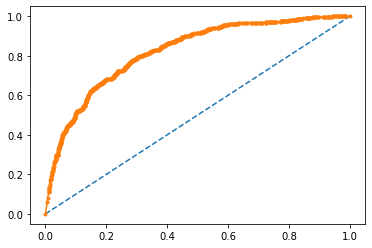

In [33]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.810


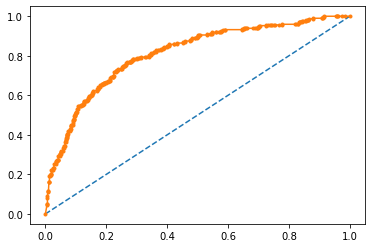

In [34]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()